### 모라벡 알고리즘 (Moravec Algorithm)
모라벡 알고리즘은 코너를 검출하는 알고리즘이며 1970년 후반에 발표되었다.  
모라벡은 아래의 제곱합의 오차(SSD(Sum of Squared Difference))를 사용해 특징점으로 확률이 높은 픽셀에 대해서는 높은 값을, 특징점으로 확률이 낮은 픽셀에 대해서는 낮은 값을 부여 했다.
$$
S(v,u) = \sum_{y} \sum_{x} w(y,x)(f(y+v,x+u)-f(y,x))^2
$$
여기서 f(.,.)는 입력 영상이고 w(.,.)는 마스크이다. 
마스크는 사이즈를 벗어난 부분에 대해 0으로 취급한다고 생각하면 된다.
예를들어 마스크의 사이즈가 3이고 좌표 (5,3)에 대해 x와 y의 범위는 각각 4\~6, 2\~4이다.

모라벡에서는 S(0,1),S(0,-1),S(1,0),S(-1,0) 중 최소값을 '특징 가능성'값으로 판단한다.
$$
C=min(S(0,1),S(0,-1),S(1,0),S(-1,0))
$$


### 코드 구현

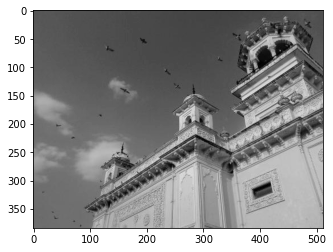

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img =cv2.imread('./data/home.jpg',cv2.IMREAD_GRAYSCALE)

plt.imshow(img,cmap='gray')
plt.show()

마스크의 크기는 편의를 위해 3으로 고정했다.
아래와 같이 각각의 방향에 대해 미리 변화량을 계산하고 마스크의 크기만큼 각 좌표에 할당한다.
마지막 confidence는 각 S의 합 중 최소값으로 한다.

In [2]:
def moravec(img):
    h,w = img.shape
    SSD01 = (img-np.pad(img[...,1:],((0,0),(0,1))))**2
    SSD01[...,-1]=0
    SSD01 = np.pad(SSD01,((1,1),(1,1)))
    SSD0m1 = (img - np.pad(img[..., :-1], ((0, 0), (1, 0)))) ** 2
    SSD0m1[..., 0] = 0
    SSD0m1 = np.pad(SSD0m1, ((1, 1), (1, 1)))
    SSD10 = (img-np.pad(img[1:],((0,1),(0,0))))**2
    SSD10[-1,...]=0
    SSD10 = np.pad(SSD10, ((1, 1), (1, 1)))
    SSDm10 = (img-np.pad(img[:-1],((1,0),(0,0))))**2
    SSDm10[0,...]=0
    SSDm10 = np.pad(SSDm10, ((1, 1), (1, 1)))
    S01=np.zeros([h,w,3,3])
    S0m1 = np.zeros([h, w, 3, 3])
    S10 = np.zeros([h, w, 3, 3])
    Sm10 = np.zeros([h, w, 3, 3])
    for i in range(h):
        for j in range(w):
            S01[i,j]=SSD01[i:i+3,j:j+3]
            S0m1[i,j] = SSD0m1[i:i+3,j:j+3]
            S10[i,j] = SSD10[i:i+3,j:j+3]
            Sm10[i,j] = SSDm10[i:i+3,j:j+3]

    confidence = np.min([np.sum(np.sum(S01,axis=2),axis=2),np.sum(np.sum(S0m1,axis=2),axis=2),np.sum(np.sum(S10,axis=2),axis=2),np.sum(np.sum(Sm10,axis=2),axis=2)],axis=0)

    return confidence,(S01,S0m1,S10,Sm10)

위의 이미지에서 하늘의 좌표(100,280)와 기둥의 뾰족한 부분(123,283)에 대해(이미지에서 파란점과 붉은점으로 표시했다.) S를 이미지화 하면 다음과 같다.

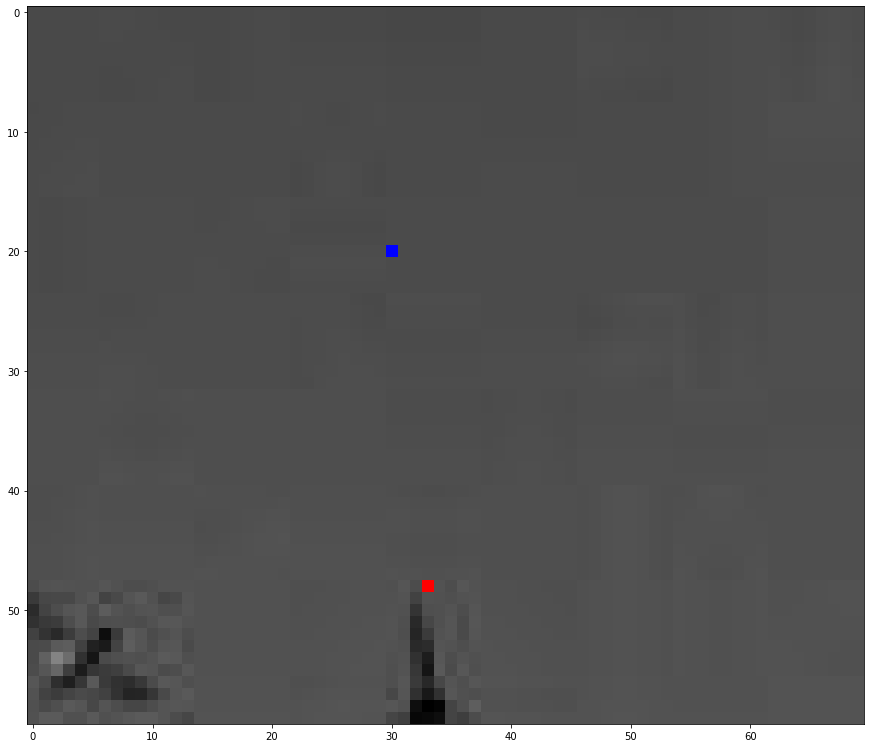

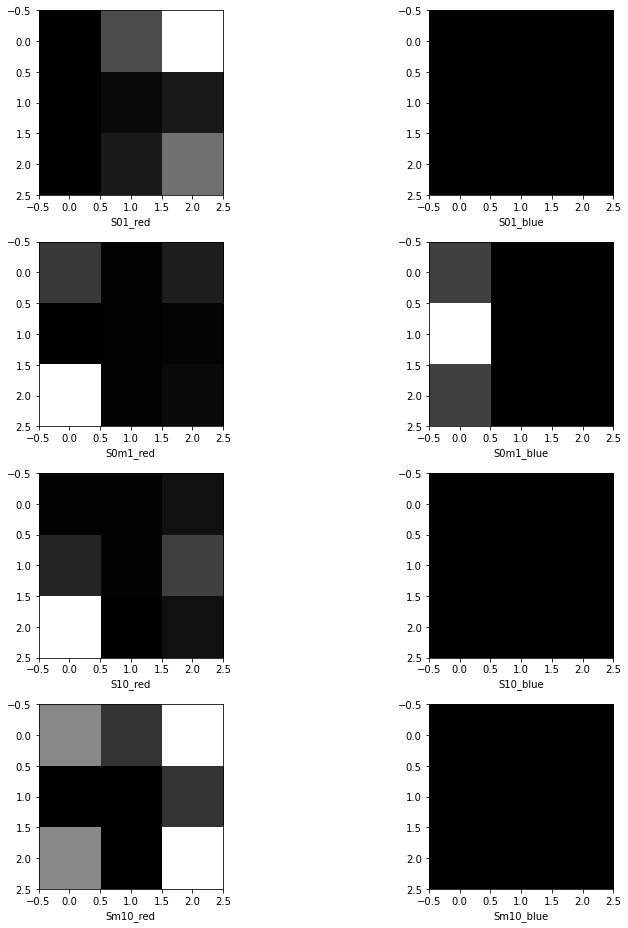

In [3]:
_,Ss = moravec(img)

img_ex = np.expand_dims(img,-1)

plt.figure(figsize=(15,15))
tmp_img= np.concatenate([img_ex,img_ex,img_ex],-1)
tmp_img[128,283,0]=255
tmp_img[128,283,1]=0
tmp_img[128,283,2]=0
tmp_img[100,280,0]=0
tmp_img[100,280,1]=0
tmp_img[100,280,2]=255
roi = tmp_img[80:140,250:320]
plt.imshow(roi)
plt.show()


fig=plt.figure(figsize=(13,13))
plt.subplot(421)
plt.imshow(Ss[0][129,284],cmap='gray')
plt.xlabel('S01_red')
plt.subplot(423)
plt.imshow(Ss[1][129, 284], cmap='gray')
plt.xlabel('S0m1_red')
plt.subplot(425)
plt.imshow(Ss[2][129, 284], cmap='gray')
plt.xlabel('S10_red')
plt.subplot(427)
plt.imshow(Ss[3][129, 284], cmap='gray')
plt.xlabel('Sm10_red')
plt.subplot(422)
plt.imshow(Ss[0][101, 281], cmap='gray')
plt.xlabel('S01_blue')
plt.subplot(424)
plt.imshow(Ss[1][101, 281], cmap='gray')
plt.xlabel('S0m1_blue')
plt.subplot(426)
plt.imshow(Ss[2][101, 281], cmap='gray')
plt.xlabel('S10_blue')
plt.subplot(428)
plt.imshow(Ss[3][101, 281], cmap='gray')
plt.xlabel('Sm10_blue')
fig.tight_layout()
plt.show()